In [1]:
#get intermediate emission sinograms
#with and without arc correction (specify with --enarc, -ear)
#load, compute com, and compar

In [54]:
import numpy as np
import matplotlib.pyplot as plt

import kex_data
import kex_headers
import petlink
import e7tools
import position
import listmode
import time
import representation

In [3]:
_, sino_paths, _ = kex_data.paths(both=True)

In [4]:
norm_path = kex_data.NORM_PATH

In [5]:
e7tools.run_tool("e7_recon -h")

stdout
 b'
                                                   (c) 2003-2015 Siemens Healthcare MI

e7_recon - calculate an image from a 2d or 3d sinogram

Usage:

 e7_recon (-e emission[,r,t,dim] [-u u-map] [-n norm[,r,t]|--np norm] [-w width]
           --oi image [--ois signed short integer image] [--oe emission]
           [--os scatter] [--fl] [--nrarc] [--naarc] [--dc] [-k a,b,...,n]
           [-r fore[,alim,wlim,klim]|ssrb|seg0] [--is iterations,subsets]
           [--chunk (pos,index)[,(pos, index)]] [--algo algorithm] [--gf]
           [--nosc] [--rs] [--tof] [--fltr filterName[,order],fwhm_xy,fwhm_z]
           [--mash4] [--izoom factor] [--lres] [--xoffs offset] [--yoffs offset]
           [--psf default|a,b,c,d,e,f,g,h,i] [--gf] [--resrv ip,port,port]
           [--regmt d1,d2,...d16] [--bp p0,p1,p2,...] [--reglt x,y]
           [--offs x,y,z] [--bmp path] [--mat a|a-b|a,b,...,n]
           [--model model|a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a2

0

In [6]:
def recon_normsino(em, outem, norm, oesuffix = ""):
    cmd_str = "e7_recon "
    cmd_str += " -e "  + em
    if oesuffix is "narc":
        #siemens default
        oesuffix = ""
    cmd_str += " --oe" + oesuffix + " " + outem
    cmd_str += " -n " + norm
    cmd_str += " --gf "
    cmd_str += " --tof --force "
    cmd_str += " -d " + mainfolder
    cmd_str += " -l 72"
    
    e7tools.run_tool(cmd_str)

In [7]:
def change_folder(path, folder):
    """ return folder + "/" + path.split('/')[-1] """
    return folder + "/" + path.split('/')[-1]

In [8]:
suffix = ["arc", "narc"]
mainfolder = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/arc_correction"
for s in suffix:
    folder = mainfolder + r"/" + s
    for p in sino_paths:
        em = p.split('-0.s')[0] + ".mhdr"
        recon_normsino(em, change_folder(em, folder), norm_path, s)     

stdout
 b''
stderr
 b"I 05/13/2020 10:14:52.368 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/13/2020 10:14:52.369 (UTC+01:00) Number of NUMA nodes: 1
I 05/13/2020 10:14:52.369 (UTC+01:00) Number of physical processor packages: 1
I 05/13/2020 10:14:52.369 (UTC+01:00) Number of processor cores: 4
I 05/13/2020 10:14:52.369 (UTC+01:00) Number of logical processors: 8
I 05/13/2020 10:14:52.369 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/13/2020 10:14:52.369 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/13/2020 10:14:52.369 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/13/2020 10:14:52.715 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/13/2020 10:14:52.716 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/13/2020 10:14:52.716 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/13/2020 10:14:52.716 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/13/2020 10:14:52.717 (UTC+01:0

stdout
 b''
stderr
 b"I 05/13/2020 10:15:04.803 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/13/2020 10:15:04.803 (UTC+01:00) Number of NUMA nodes: 1
I 05/13/2020 10:15:04.803 (UTC+01:00) Number of physical processor packages: 1
I 05/13/2020 10:15:04.803 (UTC+01:00) Number of processor cores: 4
I 05/13/2020 10:15:04.803 (UTC+01:00) Number of logical processors: 8
I 05/13/2020 10:15:04.803 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/13/2020 10:15:04.803 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/13/2020 10:15:04.803 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/13/2020 10:15:05.043 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/13/2020 10:15:05.044 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/13/2020 10:15:05.044 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/13/2020 10:15:05.044 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/13/2020 10:15:05.044 (UTC+01:0

stdout
 b''
stderr
 b"I 05/13/2020 10:15:17.935 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/13/2020 10:15:17.935 (UTC+01:00) Number of NUMA nodes: 1
I 05/13/2020 10:15:17.935 (UTC+01:00) Number of physical processor packages: 1
I 05/13/2020 10:15:17.935 (UTC+01:00) Number of processor cores: 4
I 05/13/2020 10:15:17.935 (UTC+01:00) Number of logical processors: 8
I 05/13/2020 10:15:17.935 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/13/2020 10:15:17.935 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/13/2020 10:15:17.935 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/13/2020 10:15:18.168 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/13/2020 10:15:18.169 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/13/2020 10:15:18.169 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/13/2020 10:15:18.170 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/13/2020 10:15:18.170 (UTC+01:0

stdout
 b''
stderr
 b"I 05/13/2020 10:15:30.357 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/13/2020 10:15:30.357 (UTC+01:00) Number of NUMA nodes: 1
I 05/13/2020 10:15:30.357 (UTC+01:00) Number of physical processor packages: 1
I 05/13/2020 10:15:30.357 (UTC+01:00) Number of processor cores: 4
I 05/13/2020 10:15:30.357 (UTC+01:00) Number of logical processors: 8
I 05/13/2020 10:15:30.358 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/13/2020 10:15:30.358 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/13/2020 10:15:30.358 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/13/2020 10:15:30.594 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/13/2020 10:15:30.595 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/13/2020 10:15:30.595 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/13/2020 10:15:30.595 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/13/2020 10:15:30.595 (UTC+01:0

stdout
 b''
stderr
 b"I 05/13/2020 10:15:43.195 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/13/2020 10:15:43.195 (UTC+01:00) Number of NUMA nodes: 1
I 05/13/2020 10:15:43.195 (UTC+01:00) Number of physical processor packages: 1
I 05/13/2020 10:15:43.195 (UTC+01:00) Number of processor cores: 4
I 05/13/2020 10:15:43.195 (UTC+01:00) Number of logical processors: 8
I 05/13/2020 10:15:43.195 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/13/2020 10:15:43.195 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/13/2020 10:15:43.195 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/13/2020 10:15:43.441 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/13/2020 10:15:43.442 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/13/2020 10:15:43.442 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/13/2020 10:15:43.443 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/13/2020 10:15:43.443 (UTC+01:0

stdout
 b''
stderr
 b"I 05/13/2020 10:15:55.194 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/13/2020 10:15:55.194 (UTC+01:00) Number of NUMA nodes: 1
I 05/13/2020 10:15:55.194 (UTC+01:00) Number of physical processor packages: 1
I 05/13/2020 10:15:55.194 (UTC+01:00) Number of processor cores: 4
I 05/13/2020 10:15:55.194 (UTC+01:00) Number of logical processors: 8
I 05/13/2020 10:15:55.194 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/13/2020 10:15:55.194 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/13/2020 10:15:55.195 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/13/2020 10:15:55.433 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/13/2020 10:15:55.435 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/13/2020 10:15:55.435 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/13/2020 10:15:55.435 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/13/2020 10:15:55.435 (UTC+01:0

stdout
 b''
stderr
 b"I 05/13/2020 10:16:07.143 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/13/2020 10:16:07.143 (UTC+01:00) Number of NUMA nodes: 1
I 05/13/2020 10:16:07.143 (UTC+01:00) Number of physical processor packages: 1
I 05/13/2020 10:16:07.143 (UTC+01:00) Number of processor cores: 4
I 05/13/2020 10:16:07.143 (UTC+01:00) Number of logical processors: 8
I 05/13/2020 10:16:07.143 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/13/2020 10:16:07.143 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/13/2020 10:16:07.143 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/13/2020 10:16:07.395 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/13/2020 10:16:07.396 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/13/2020 10:16:07.396 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/13/2020 10:16:07.397 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/13/2020 10:16:07.397 (UTC+01:0

stdout
 b''
stderr
 b"I 05/13/2020 10:16:19.259 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/13/2020 10:16:19.259 (UTC+01:00) Number of NUMA nodes: 1
I 05/13/2020 10:16:19.259 (UTC+01:00) Number of physical processor packages: 1
I 05/13/2020 10:16:19.259 (UTC+01:00) Number of processor cores: 4
I 05/13/2020 10:16:19.259 (UTC+01:00) Number of logical processors: 8
I 05/13/2020 10:16:19.259 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/13/2020 10:16:19.259 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/13/2020 10:16:19.259 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/13/2020 10:16:19.507 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/13/2020 10:16:19.508 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/13/2020 10:16:19.508 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/13/2020 10:16:19.508 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/13/2020 10:16:19.508 (UTC+01:0

In [9]:
if "apa" is "apa":
    print("ho")

ho


In [10]:
norm_path

'C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n.hdr'

In [11]:
sinograms = {}

for s in suffix:
    folder = mainfolder + r"/" + s
    temp = []
    for p in sino_paths:
        em = p.split('-0.s')[0] + "_00.s"
        oem = change_folder(em, folder)
        with open(oem, 'rb') as f:
            sino_1d = np.fromfile(f, dtype=np.float32)
        temp.append(np.reshape(sino_1d, kex_headers.HISTOGRAM_SHAPE_NO_DELAYS))
        sinograms[s] = temp

In [12]:
center_of_mass = {}
for suff in suffix:
    coms = []
    sinos = sinograms[suff]
    for sino in sinos:
        coms.append(position.center_of_mass(sino))
    center_of_mass[suff] = coms

In [13]:
for data_num in range(4):
    print("datanum", data_num, "com difference with/without arc correction")
    print(np.array(center_of_mass["arc"][data_num]) -np.array(center_of_mass["narc"][data_num]))

datanum 0 com difference with/without arc correction
[ 0.00318795  0.04704914  0.00171479 -0.06079124]
datanum 1 com difference with/without arc correction
[ 0.004023   -0.03785952  0.00284679 -0.46585584]
datanum 2 com difference with/without arc correction
[ 0.00579342  0.00189743 -0.02168562 -0.23502274]
datanum 3 com difference with/without arc correction
[ 0.03919849 -0.25968684 -0.03666741 -1.25237871]


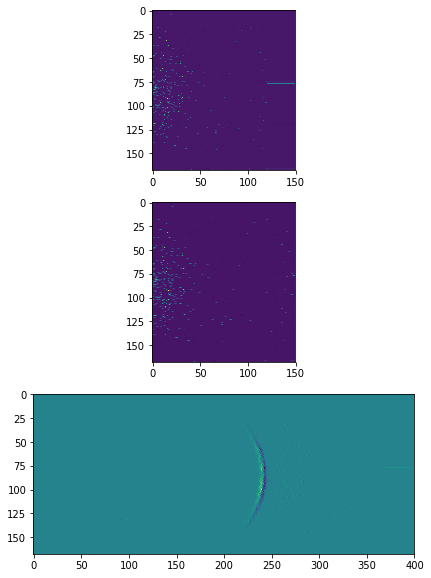

In [26]:
tof = 0
mi = 50
data_num = 2
sinos = []
for s in suffix:
    sinos.append(sinograms[s][data_num][tof,mi])

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.imshow(sinos[0][:,250:])
plt.subplot(312)
plt.imshow(sinos[1][:, 250:])
plt.subplot(313)
plt.imshow(sinos[0]-sinos[1])
plt.show()


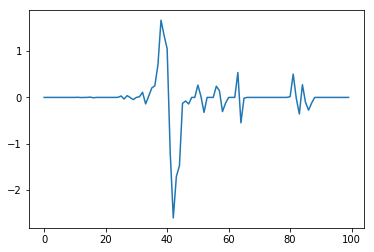

In [15]:
diff = sinos[0] - sinos[1]
plt.plot(diff[75][200:300])

In [16]:
A = np.eye(4)
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [17]:
A.nonzero()

(array([0, 1, 2, 3], dtype=int64), array([0, 1, 2, 3], dtype=int64))

In [18]:
A.nonzero()[0]

array([0, 1, 2, 3], dtype=int64)

In [19]:
np.array(A.nonzero())

array([[0, 1, 2, 3],
       [0, 1, 2, 3]], dtype=int64)

In [20]:
A = np.eye(2)
B = A[0,None]
print("A\n",A, "\nB\n", B)
C = np.concatenate((B,A), axis=0)
print("C\n", C)

A
 [[1. 0.]
 [0. 1.]] 
B
 [[1. 0.]]
C
 [[1. 0.]
 [1. 0.]
 [0. 1.]]


In [50]:
listmode_dataset = {}
for suff in suffix:
    time_a = time.time()
    sinos = sinograms[suff]
    limos = []
    for s in sinos:
        limos.append(listmode.get_listmode(s))
    listmode_dataset[suff] = limos
    time_b = time.time()
    print(time_b-time_a)

28.087862968444824
67.50330400466919


In [60]:
print(listmode_dataset['narc'][0].shape)
print(sinograms['arc'][0].shape)
print(sinograms['arc'][0].size / listmode_dataset['narc'][0].size)
print(suffix)

(4, 116820017)
(13, 621, 168, 400)
1.1609859635613646
['arc', 'narc']


In [63]:
image_bins = {}
for suff in suffix:
    time_a = time.time()
    limos = listmode_dataset[suff]
    ibins = []
    for lm in limos:
        ibins.append(representation.get_image_bins(lm))
    
    img_bins[suff] = ibins
    time_b = time.time()
    print(time_b - time_a)

NameError: name 'img_bins' is not defined